<a href="https://colab.research.google.com/github/sushantkumar-estech/Iris-classification-using-ANN-with-Pytorch/blob/master/iris_dataset_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
pwd

'/content'

In [9]:
print(torch.__version__)

1.6.0+cu101


In [10]:
# Mounting the drive with colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df = pd.read_csv('/content/drive/My Drive/ML_Dataset/Pytorch_dataset/iris.csv')

In [12]:
# df = pd.read_csv('D:\Machine Learning_Udemy\9. PyTorch for Deep Learning with Python Bootcamp\Data\iris.csv')

In [13]:
df.head()   # Data features of an iris flowers along with target

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [14]:
df.shape

(150, 5)

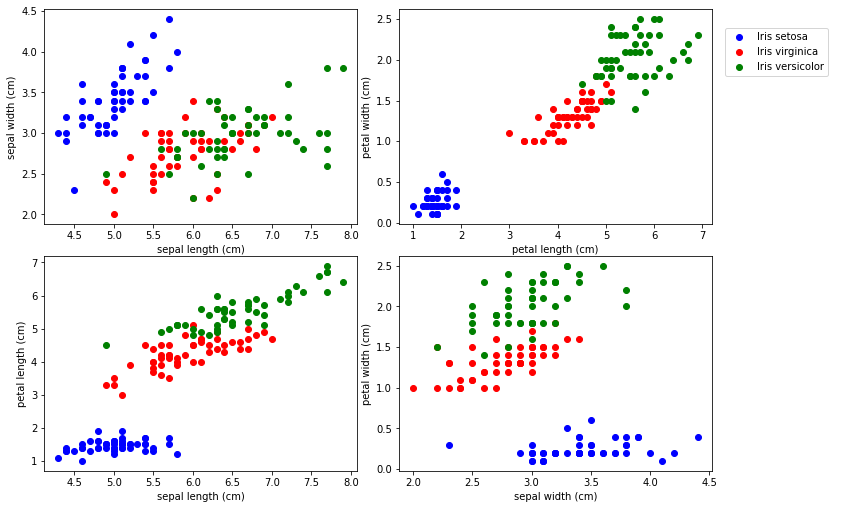

In [15]:
# PLOT the DATA
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [16]:
#Method1 : for splitting dataset into Train and Test Dataset
from sklearn.model_selection import train_test_split

In [17]:
features = df.drop('target', axis = 1).values
label = df['target'].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=33)

In [19]:
X_train.size

480

In [20]:
# Converting them to float Tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [21]:
y_train = torch.LongTensor(y_train).reshape(-1,1)
y_test = torch.LongTensor(y_test).reshape(-1,1)

In [22]:
#Method 2: using pytorch utils for splitting training and tesrting dataset
from torch.utils.data import TensorDataset , DataLoader

In [23]:
data = df.drop('target', axis=1).values
labels = df['target'].values

In [24]:
iris = TensorDataset(torch.FloatTensor(data), torch.LongTensor(labels))

In [25]:
type(iris)

torch.utils.data.dataset.TensorDataset

In [26]:
len(iris)

150

In [27]:
for i in iris:
    print(i)

(tensor([5.1000, 3.5000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.0000, 1.4000, 0.2000]), tensor(0))
(tensor([4.7000, 3.2000, 1.3000, 0.2000]), tensor(0))
(tensor([4.6000, 3.1000, 1.5000, 0.2000]), tensor(0))
(tensor([5.0000, 3.6000, 1.4000, 0.2000]), tensor(0))
(tensor([5.4000, 3.9000, 1.7000, 0.4000]), tensor(0))
(tensor([4.6000, 3.4000, 1.4000, 0.3000]), tensor(0))
(tensor([5.0000, 3.4000, 1.5000, 0.2000]), tensor(0))
(tensor([4.4000, 2.9000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.1000, 1.5000, 0.1000]), tensor(0))
(tensor([5.4000, 3.7000, 1.5000, 0.2000]), tensor(0))
(tensor([4.8000, 3.4000, 1.6000, 0.2000]), tensor(0))
(tensor([4.8000, 3.0000, 1.4000, 0.1000]), tensor(0))
(tensor([4.3000, 3.0000, 1.1000, 0.1000]), tensor(0))
(tensor([5.8000, 4.0000, 1.2000, 0.2000]), tensor(0))
(tensor([5.7000, 4.4000, 1.5000, 0.4000]), tensor(0))
(tensor([5.4000, 3.9000, 1.3000, 0.4000]), tensor(0))
(tensor([5.1000, 3.5000, 1.4000, 0.3000]), tensor(0))
(tensor([5.7000, 3.8000, 1.7

In [28]:
# Shuffling the data and producing batch of the data
iris_loader = DataLoader(iris, batch_size = 10, shuffle = True)

In [29]:
for i_batch, sample_batch in enumerate(iris_loader):
    print(i_batch, sample_batch)

0 [tensor([[6.7000, 3.3000, 5.7000, 2.1000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [6.3000, 2.5000, 4.9000, 1.5000],
        [6.0000, 2.2000, 4.0000, 1.0000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [6.3000, 3.3000, 4.7000, 1.6000],
        [5.5000, 2.5000, 4.0000, 1.3000],
        [5.5000, 2.4000, 3.8000, 1.1000],
        [4.4000, 3.2000, 1.3000, 0.2000],
        [5.5000, 2.3000, 4.0000, 1.3000]]), tensor([2, 0, 1, 1, 0, 1, 1, 1, 0, 1])]
1 [tensor([[5.7000, 2.5000, 5.0000, 2.0000],
        [6.4000, 3.2000, 5.3000, 2.3000],
        [5.3000, 3.7000, 1.5000, 0.2000],
        [5.2000, 3.4000, 1.4000, 0.2000],
        [6.2000, 2.9000, 4.3000, 1.3000],
        [5.6000, 3.0000, 4.5000, 1.5000],
        [7.3000, 2.9000, 6.3000, 1.8000],
        [5.0000, 3.2000, 1.2000, 0.2000],
        [5.9000, 3.0000, 5.1000, 1.8000],
        [4.6000, 3.2000, 1.4000, 0.2000]]), tensor([2, 2, 0, 0, 1, 1, 2, 0, 2, 0])]
2 [tensor([[7.7000, 3.8000, 6.7000, 2.2000],
        [6.8000, 3.0000, 

In [30]:
for batch in (iris_loader):
    print(batch)

[tensor([[6.2000, 2.9000, 4.3000, 1.3000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [5.0000, 3.4000, 1.6000, 0.4000],
        [7.2000, 3.0000, 5.8000, 1.6000],
        [5.6000, 2.5000, 3.9000, 1.1000],
        [6.3000, 3.3000, 4.7000, 1.6000],
        [5.6000, 2.9000, 3.6000, 1.3000],
        [6.4000, 2.8000, 5.6000, 2.2000],
        [5.5000, 2.4000, 3.7000, 1.0000],
        [5.0000, 3.5000, 1.6000, 0.6000]]), tensor([1, 0, 0, 2, 1, 1, 1, 2, 1, 0])]
[tensor([[6.4000, 2.9000, 4.3000, 1.3000],
        [6.1000, 2.8000, 4.7000, 1.2000],
        [5.4000, 3.0000, 4.5000, 1.5000],
        [6.9000, 3.1000, 4.9000, 1.5000],
        [6.4000, 3.2000, 4.5000, 1.5000],
        [6.8000, 2.8000, 4.8000, 1.4000],
        [4.8000, 3.4000, 1.9000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [6.2000, 2.2000, 4.5000, 1.5000],
        [6.9000, 3.1000, 5.1000, 2.3000]]), tensor([1, 1, 1, 1, 1, 1, 0, 0, 1, 2])]
[tensor([[5.7000, 2.6000, 3.5000, 1.0000],
        [5.6000, 3.0000, 4.1000